In [ ]:
# import the libraries
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# loading the dataset without data set
(x_train, _),(x_test, _) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


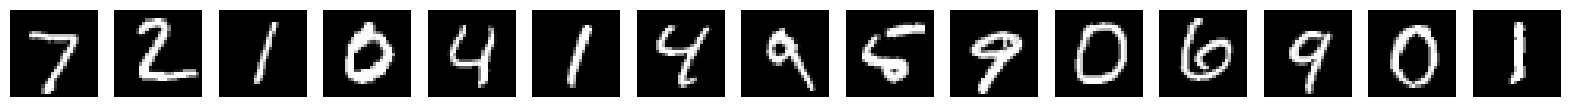

In [ ]:
# displaying the data
n = 15

plt.figure(figsize = (20,4))

for v in range(n):
    pic = plt.subplot(3,n,v+1)
    plt.imshow(x_test[v].reshape(28,28),cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close()

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# first convert in float and then devide by 255 to convert range(0,1)
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((len(x_train)) , 28*28*1)
x_test = x_test.reshape((len(x_test)) , 28*28*1)

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, MaxPooling2D, UpSampling2D, Reshape
from tensorflow.keras.models import Model

# Encoder
input_layer_cnv = Input(shape=(28,28,1))

ae_cnv_en = Conv2D(32,(3,3), activation='relu', padding='same', kernel_initializer='he_normal')(input_layer_cnv)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(32,(3,3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Conv2D(4,(3,3), activation='relu', padding='same')(ae_cnv_en)
ae_cnv_en = MaxPooling2D((2,2), padding='same')(ae_cnv_en)

ae_cnv_en = Flatten(name='bot')(ae_cnv_en)

# Decoder
ae_cnv_de = Reshape((4,4,4), input_shape=(64,), name='botnext0')(ae_cnv_en)

ae_cnv_de = Conv2D(4,(3,3), activation='relu', padding='same', name='botnext1')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name='botnext2')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='same', name='botnext3')(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2), name='botnext4')(ae_cnv_de)

ae_cnv_de = Conv2D(32,(3,3), activation='relu', padding='valid', name='botnext5')(ae_cnv_de)
# Only upsample by (1,1) instead of (2,2) to avoid increasing the size beyond 28x28
ae_cnv_de = UpSampling2D((2,2), name='botnext6')(ae_cnv_de)

# Final layer should output (28, 28, 1) to match the input
ae_cnv_de = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='botnext7')(ae_cnv_de)

# Model definition
auto_encoder_model = Model(inputs=input_layer_cnv, outputs=ae_cnv_de)

# Compile the model
auto_encoder_model.compile(optimizer=tf.keras.optimizers.SGD(0.09, clipvalue=2.5), loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
auto_encoder_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(x_train.shape,x_test.shape)

(60000, 784) (10000, 784)


# Reshaping the data

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Training the Auto Encoder

In [ ]:
from time import time
curr_time  = time()

auto_encoder_model.fit(x_train,x_train,
                        epochs = 5,
                        verbose = 2,
                        batch_size = 256,
                        shuffle = False,
                        validation_split = 0.2
                        )
training_time = time()
print(f'Model took {training_time - curr_time}secs')
print('Model took {} secs'.format(training_time - curr_time))

Epoch 1/5


KeyboardInterrupt: 

In [ ]:
decoded_imgs = auto_encoder_model.predict(x_test)
# print('Recreated images ',decoded_imgs)

n = 15
k= 12
plt.figure(figsize = (20,4))

for v in range(n):
    # display original images
    pic = plt.subplot(3,n,v+1)
    plt.imshow(x_test[v*k].reshape(28,28) ,cmap='gray')
    plt.axis('off')

    # display constructed/generated
    pic = plt.subplot(3,n,v+1+n)
    plt.imshow(decoded_imgs[v*k].reshape(28,28) , cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close()


# Encoder

In [ ]:
ae_conv_encoder_model = Model(inputs = input_layer_cnv, outputs = auto_encoder_model.get_layer('bot').output , name = 'Conv_AutoEncoder_Encoder')
ae_conv_encoder_model.summary()

Image testing with encoder

In [ ]:
encoded_imgs = ae_conv_encoder_model.predict(x_test)
print(encoded_imgs.shape)

# Decoder

In [ ]:
decoder_inp_conv = Input(shape = (64,))

tmp_dec = auto_encoder_model.get_layer('botnext0')(decoder_inp_conv)

for layer in range(1,8):
    st = 'botnext{}'.format(layer)
    tmp_dec = auto_encoder_model.get_layer(st)(tmp_dec)

ae_conv_decoder_model = Model(inputs = decoder_inp_conv , outputs = tmp_dec , name = 'Conv_AutoEncoder_Decoder' )

ae_conv_decoder_model.summary()

Image testing whit decoder

In [ ]:
decoded_imgs = ae_conv_decoder_model.predict(encoded_imgs)

# displaying the images
n = 15
k = 12
plt.figure(figsize = (20,5))

for img in range(n):
    # display original image
    pic = plt.subplot(2,n,img+1)
    plt.imshow(x_test[img*k].reshape(28,28),cmap = 'gray')
    plt.axis('off')

    # displaying the pridicted/generated image
    pic = plt.subplot(2,n,img+1+n)
    plt.imshow(decoded_imgs[img*k].reshape(28,28),cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close()

In [ ]:
print(x_train.shape , x_test.shape)

# With Noise Images

In [ ]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc = 0.0,scale = 1.0,size = x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc = 0.0 ,scale = 1.0 , size = x_test.shape)

x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy , 0.,1.)

print(x_train_noisy.shape , x_test_noisy.shape )

(60000, 28, 28, 1) (10000, 28, 28, 1)


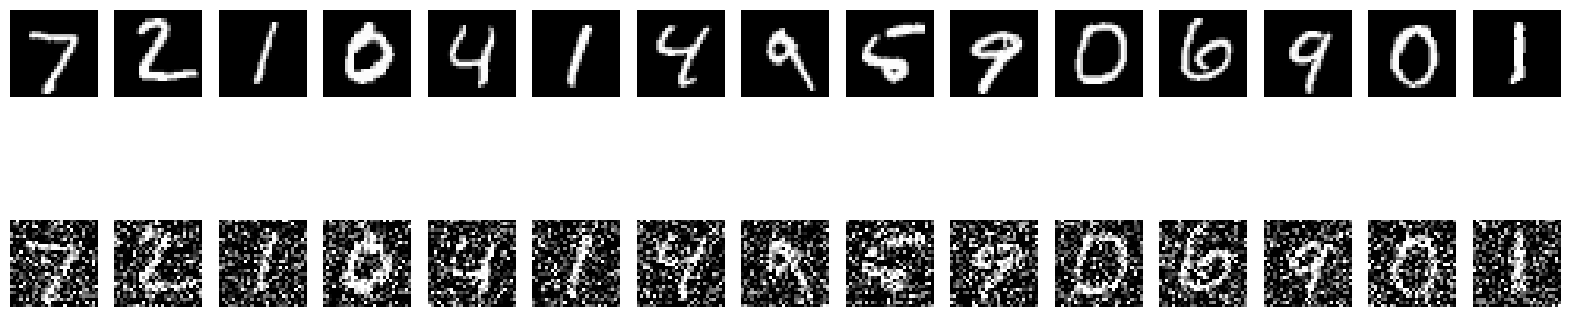

In [ ]:
n = 15
plt.figure(figsize = (20,5))

for img in range(n):
    # display the original image
    pic = plt.subplot(2,n,img+1)
    plt.imshow(x_test[img].reshape(28,28),cmap = 'gray')
    plt.axis('off')

    # display the noisy image
    noisy_pic = plt.subplot(2,n,img+1+n)
    plt.imshow(x_test_noisy[img].reshape(28,28),cmap = 'gray')
    plt.axis('off')

plt.show()
plt.close()

 **Defining layers**

In [ ]:
conv_input_layer = Input(shape = (28,28,1))
# hidder layer 1
conv_auto_encoder = Conv2D(32,(3,3),padding = 'same',activation = 'relu',kernel_initializer = 'he_normal')(conv_input_layer)
# hidder layer 2 max pooling layer
conv_auto_encoder = MaxPooling2D((2,2),padding = 'same')(conv_auto_encoder)
# hidder layer 3 convolutional layer
conv_auto_encoder = Conv2D(32,(3,3),padding = 'same',activation = 'relu')(conv_auto_encoder)
# hidden layer 4 max pooling
conv_auto_encoder = MaxPooling2D((2,2),padding = 'same')(conv_auto_encoder)
# hidder layer 5 convolutional layer
conv_auto_encoder = Conv2D(4,(3,3),padding = 'same',activation= 'relu')(conv_auto_encoder)
#hidden layer 6 max pooling
conv_auto_encoder = MaxPooling2D((2,2),padding = 'same')(conv_auto_encoder)

# now flatten the images/data into latent represententation
conv_auto_encoder = Flatten(name = 'bot')(conv_auto_encoder)

# now reshape the latent represententation to normal data
conv_auto_decoder = Reshape((4,4,4),input_shape = (64,),name = 'botnext0')(conv_auto_encoder)

conv_auto_decoder = Conv2D(4,(3,3),padding = 'same',activation = 'relu',name = 'botnext1')(conv_auto_decoder)

conv_auto_decoder = UpSampling2D((2,2),name = 'botnext2')(conv_auto_decoder)

conv_auto_decoder = Conv2D(32,(3,3),padding = 'same',activation = 'relu',name = 'botnext3')(conv_auto_decoder)

conv_auto_decoder = UpSampling2D((2,2),name = 'botnext4')(conv_auto_decoder)

conv_auto_decoder = Conv2D(32,(3,3),padding = 'valid',activation = 'relu',name = 'botnext5')(conv_auto_decoder)

conv_auto_decoder = UpSampling2D((2,2),name = 'botnext6')(conv_auto_decoder)
# output layer
conv_auto_decoder = Conv2D(1,(3,3),padding = 'same',activation = 'sigmoid',name = 'botnext7')(conv_auto_decoder)
#model difination
auto_encoder_model = Model(inputs = conv_input_layer,outputs = conv_auto_decoder)

auto_encoder_model.compile(optimizer = tf.keras.optimizers.SGD(0.09),loss = 'binary_crossentropy',metrics = ['accuracy'])

auto_encoder_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 4)             │           1,156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bot (Flatten)                        │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext0 (Reshape)                   │ (None, 4, 4, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext1 (Conv2D)                    │ (None, 4, 4, 4)             │             148 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext2 (UpSampling2D)              │ (None, 8, 8, 4)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext3 (Conv2D)                    │ (None, 8, 8, 32)            │           1,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext4 (UpSampling2D)              │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext5 (Conv2D)                    │ (None, 14, 14, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext6 (UpSampling2D)              │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ botnext7 (Conv2D)                    │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,593 (84.35 KB)

 Trainable params: 21,593 (84.35 KB)

 Non-trainable params: 0 (0.00 B)

Training the model

In [ ]:
from time import time
curr_time = time()

auto_encoder_model.fit(x_train_noisy,x_train,
                       epochs = 10,
                       batch_size = 256,
                       verbose = 2,
                       shuffle = False,
                       validation_split= 0.1)

training_time = time()
print(f'Model took {training_time - curr_time}secs')
# print('Model took {} secs'.format(training_time - curr_time))

Epoch 1/10
211/211 - 130s - 617ms/step - accuracy: 0.7951 - loss: 0.2898 - val_accuracy: 0.8047 - val_loss: 0.2355
Epoch 2/10
211/211 - 141s - 666ms/step - accuracy: 0.7932 - loss: 0.2277 - val_accuracy: 0.7897 - val_loss: 0.2159
Epoch 3/10
211/211 - 139s - 659ms/step - accuracy: 0.7933 - loss: 0.2125 - val_accuracy: 0.7946 - val_loss: 0.2024
Epoch 4/10
211/211 - 123s - 584ms/step - accuracy: 0.7945 - loss: 0.2020 - val_accuracy: 0.8015 - val_loss: 0.1973
Epoch 5/10
211/211 - 146s - 692ms/step - accuracy: 0.7956 - loss: 0.1949 - val_accuracy: 0.7909 - val_loss: 0.1929
Epoch 6/10
211/211 - 143s - 678ms/step - accuracy: 0.7966 - loss: 0.1897 - val_accuracy: 0.7982 - val_loss: 0.1844
Epoch 7/10
211/211 - 139s - 658ms/step - accuracy: 0.7974 - loss: 0.1852 - val_accuracy: 0.7987 - val_loss: 0.1808
Epoch 8/10
211/211 - 145s - 689ms/step - accuracy: 0.7981 - loss: 0.1818 - val_accuracy: 0.7993 - val_loss: 0.1779
Epoch 9/10
211/211 - 139s - 658ms/step - accuracy: 0.7986 - loss: 0.1791 - val_a

313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 46ms/step


TypeError: unsupported operand type(s) for *: 'Axes' and 'int'

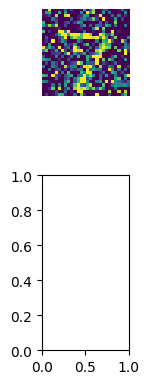

In [19]:
n = 15
k = 12
plt.figure(figsize = (20,5))
decoded_noisy_imgs = auto_encoder_model.predict(x_test_noisy)

for noisy_img in range(n):
    #display noisy original layer
    img = plt.subplot(2,n,noisy_img+1)
    plt.imshow(x_test_noisy[noisy_img * k].reshape(28,28))
    plt.axis('off')

    # display genrated image
    noisy_img = plt.subplot(2,n,noisy_img+1+n)
    plt.imshow(decoded_noisy_imgs[noisy_img * k].reshape(28,28))
    plt.axis('off')

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


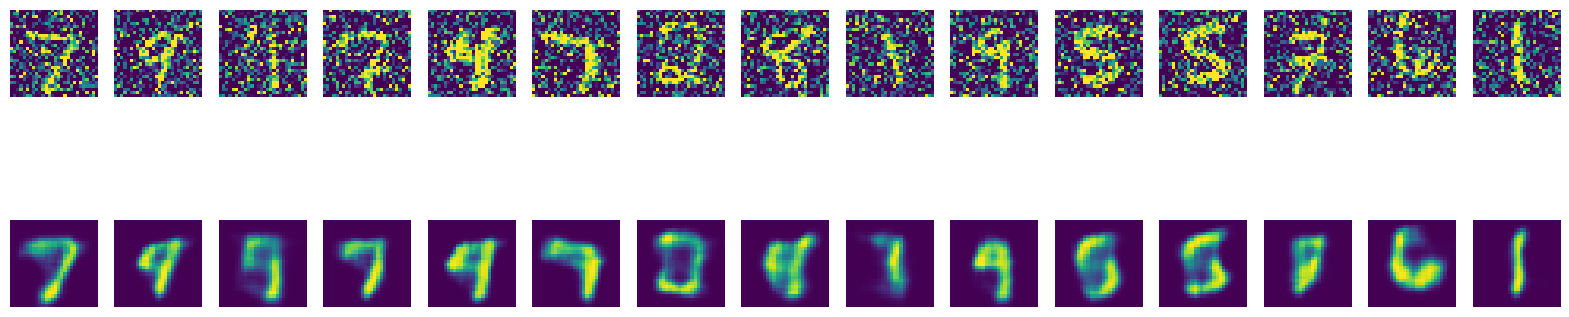

In [20]:
n = 15
k = 12
plt.figure(figsize = (20,5))
decoded_noisy_imgs = auto_encoder_model.predict(x_test_noisy)

for i in range(n):
    #display noisy original layer
    ax = plt.subplot(2, n, i + 1) # Assign to ax for clarity
    plt.imshow(x_test_noisy[i * k].reshape(28, 28))
    plt.axis('off')

    # display generated image
    ax = plt.subplot(2, n, i + 1 + n) # Assign to ax for clarity
    plt.imshow(decoded_noisy_imgs[i * k].reshape(28, 28))
    plt.axis('off')